In [51]:
# http://www.datasciencesmachinelearning.com/2019/01/arimasarima-in-python.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('AirPassengers.csv')
data['#Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

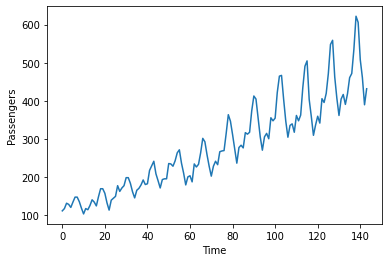

In [52]:
# plot the data
plt.plot(data['#Passengers'])
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

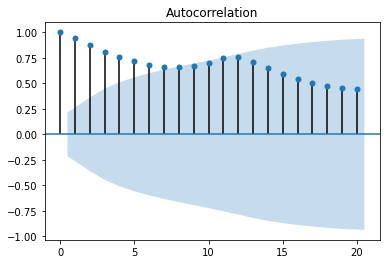

In [37]:
# Autocorrelation Function

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['#Passengers'], lags = 20, alpha=0.01)
plt.show()
# 99% confidence Intervals

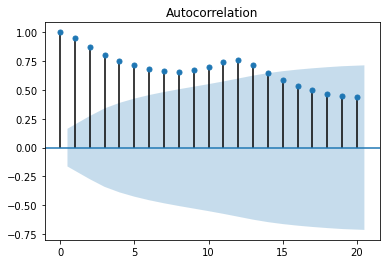

In [38]:
plot_acf(data['#Passengers'], lags = 20, alpha=0.05)
plt.show()
# 95% confidence intervals
# width of the band decreases with the increase in alpha

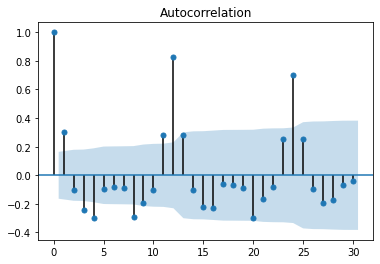

In [39]:
# Using partial autocorrelation

# Differencing
data_df = data['#Passengers'].diff()
data_df = data_df.dropna()

# Plot ACF
plot_acf(data_df, lags = 30)
plt.show()

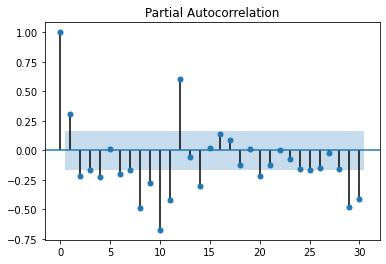

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_df, lags= 30)
plt.show()

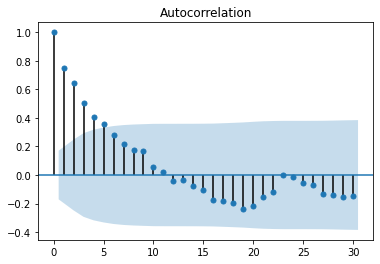

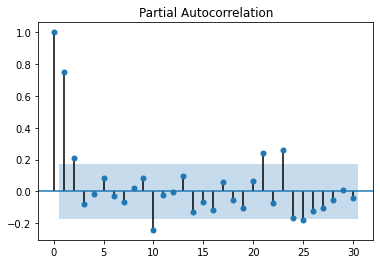

In [41]:
# Seasonal Differencing
data_df = data['#Passengers'].diff(12)
data_df = data_df.dropna()

# Plot ACF
plot_acf(data_df, lags = 30)

# Plot PACF
plot_pacf(data_df, lags = 30)

plt.show()

In [42]:
# Fit an ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

# Fit ARIMA model (1,1,1)
model = ARIMA(data['#Passengers'], order=(1,1,1))
res = model.fit()

print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Fri, 29 May 2020   AIC                           1402.145
Time:                        12:45:16   BIC                           1413.997
Sample:                             1   HQIC                          1406.961
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.#Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.#Passeng

In [43]:
# Fit a SARIMA Model
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data['#Passengers'],
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Fri, 29 May 2020   AIC                            922.205
Time:                                    12:45:17   BIC                            936.016
Sample:                                         0   HQIC                           927.812
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

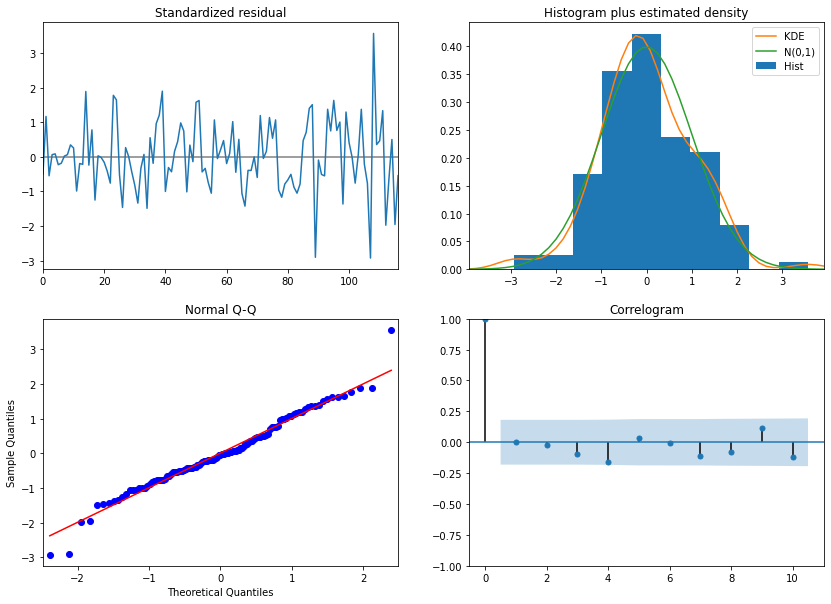

In [44]:
# Diagnostic plots
# we would want the residuals to be a whitye noice process

results.plot_diagnostics(figsize=(14,10))
plt.show()

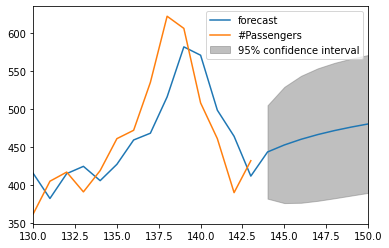

In [53]:
# Forecastingmin ARIMA
res.plot_predict(start=130, end=150)
plt.show()

In [55]:
# Forecasting in SARIMA

# Forecast 12 steps ahead
forecast_values = results.get_forecast(steps=12)

# Confidence Intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

# Prediciton summary
forecast_values.summary_frame()

#Passengers,mean,mean_se,mean_ci_lower,mean_ci_upper
144,447.222620,11.844600,424.007631,470.437608
145,422.734098,14.266936,394.771419,450.696778
146,457.700895,16.787551,424.797899,490.603890
147,492.277505,18.881302,455.270833,529.284177
148,505.563366,20.784704,464.826094,546.300637
149,565.671782,22.523671,521.526198,609.817366
150,651.986404,24.138577,604.675663,699.297145
151,639.634242,25.651824,589.357592,689.910893
152,543.058845,27.080685,489.981677,596.136013
153,493.727025,28.437835,437.989893,549.464157


In [56]:
# Prediction
forecast_values.predicted_mean

144    447.222620
145    422.734098
146    457.700895
147    492.277505
148    505.563366
149    565.671782
150    651.986404
151    639.634242
152    543.058845
153    493.727025
154    426.938001
155    470.135609
dtype: float64

In [57]:
# Confidence Intervals
forecast_values.conf_int()

,lower #Passengers,upper #Passengers
144,424.007631,470.437608
145,394.771419,450.696778
146,424.797899,490.603890
147,455.270833,529.284177
148,464.826094,546.300637
149,521.526198,609.817366
150,604.675663,699.297145
151,589.357592,689.910893
152,489.981677,596.136013
153,437.989893,549.464157


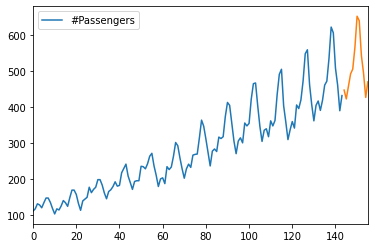

In [60]:
# Plot the data
ax = data.plot()

# Plot the forecasted values
forecast_values.predicted_mean.plot(ax=ax, label='Forecasts')

